# Troubleshooting the Perceptron from scratch in numpy

We check the perceptron classifier on linearly separable data, consider scaling and shuffling of data. 

In [9]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0
        
        self.errors_ = []

        for _ in range(self.n_iter):     ## loop over epochs
            indices = np.arange(X.shape[0])  #shuffle the data each time around. Do we need to do this??
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]
            errors = 0
            for xi, target in zip(X, y):    ## loop over each sample, adjusting weights and bias
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi    ## What is vector and what is scalar here?
                self.b_ += update
                errors += int(update != 0.0)  ## if the update is zero, the sample is correctly classified; counts how many are not
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Try on the penguins data to predict Gentoo or not

In [2]:
import pandas as pd
import numpy as np

penguins = pd.read_csv('/Users/blove/PycharmProjects/deepLearning/Data/penguins.csv')
cars = pd.read_csv('/Users/blove/PycharmProjects/deepLearning/Data/cars.csv')

penguins.head()

,...1,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,above_average_weight,sex
0,1,Adelie,Torgersen,2007,39.1,18.7,181,3750,0,male
1,2,Adelie,Torgersen,2007,39.5,17.4,186,3800,0,female
2,3,Adelie,Torgersen,2007,40.3,18.0,195,3250,0,female
3,5,Adelie,Torgersen,2007,36.7,19.3,193,3450,0,female
4,6,Adelie,Torgersen,2007,39.3,20.6,190,3650,0,male


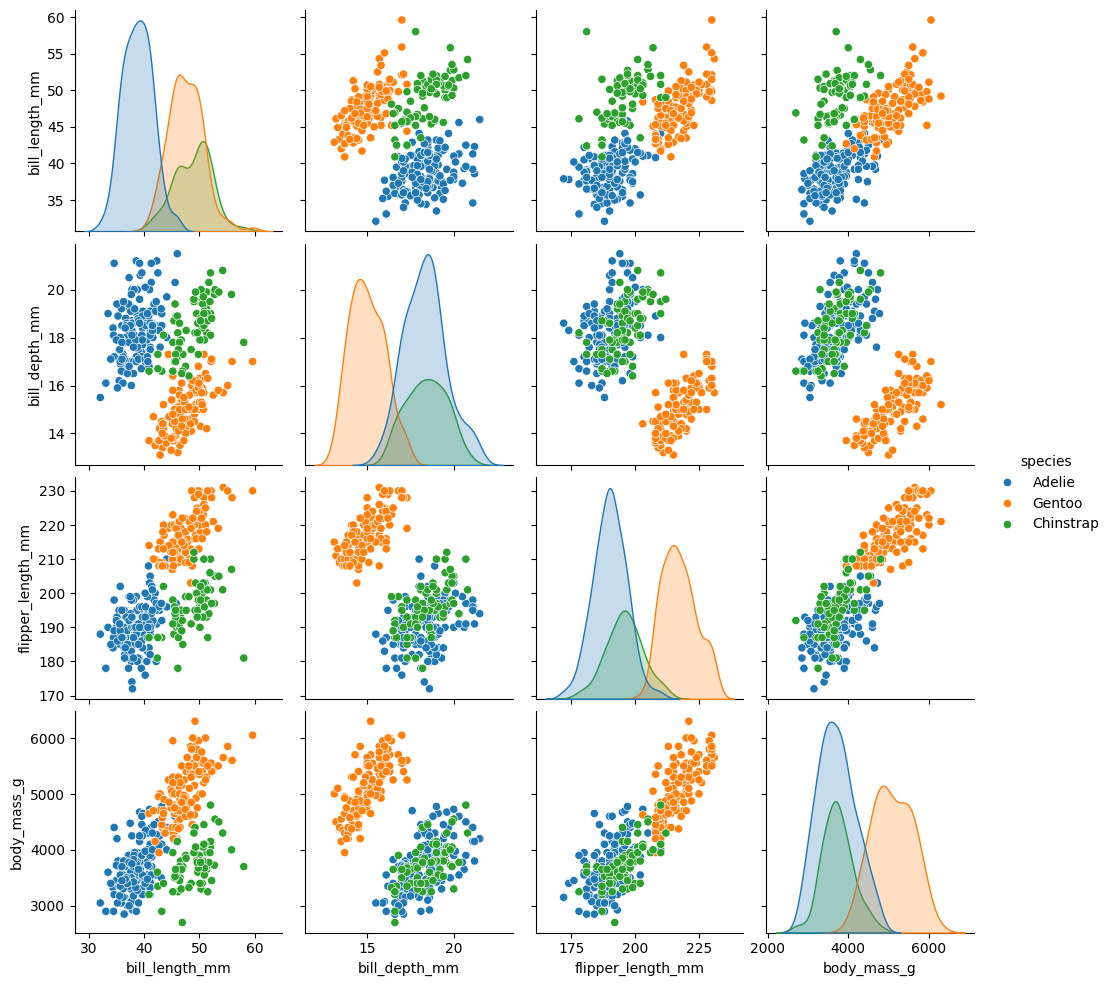

In [5]:

import seaborn as sns
grid = sns.pairplot(data=penguins, vars= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species')

In [6]:

penguins['isGentoo'] = np.where(penguins['species'] == 'Gentoo', 1, 0)


X = penguins[['bill_depth_mm', 'flipper_length_mm', 'bill_length_mm']]
y = penguins['isGentoo']

In [7]:
penguins 

,...1,species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,above_average_weight,sex,isGentoo
0,1,Adelie,Torgersen,2007,39.1,18.7,181,3750,0,male,0
1,2,Adelie,Torgersen,2007,39.5,17.4,186,3800,0,female,0
2,3,Adelie,Torgersen,2007,40.3,18.0,195,3250,0,female,0
3,5,Adelie,Torgersen,2007,36.7,19.3,193,3450,0,female,0
4,6,Adelie,Torgersen,2007,39.3,20.6,190,3650,0,male,0
...,...,...,...,...,...,...,...,...,...,...,...
328,340,Chinstrap,Dream,2009,55.8,19.8,207,4000,0,male,0
329,341,Chinstrap,Dream,2009,43.5,18.1,202,3400,0,female,0
330,342,Chinstrap,Dream,2009,49.6,18.2,193,3775,0,male,0
331,343,Chinstrap,Dream,2009,50.8,19.0,210,4100,0,male,0


In [10]:
ppn = Perceptron(eta= .1, n_iter=20)
ppn.fit(X.values, y.values)

In [ ]:
ppn.w_


Plot the number of errors each epoch. Something wrong here??

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Try scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ppn = Perceptron(eta= .01, n_iter=500)
ppn.fit(X_scaled, y.values) 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

## Try on iris data 

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()



In [ ]:
type(iris)
iris.keys()

#iris.data

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names )
iris_df['target'] = iris.target

iris_df.head()
iris.target_names

iris_df['species'] = iris.target_names[iris.target]

In [ ]:
iris_df.head()
#iris.isna().sum()



In [ ]:
grid = sns.pairplot(iris_df.drop(columns=['target']), hue='species', diag_kind='kde')

In [ ]:
iris.target_names

Predict `setosa`

In [ ]:
X = iris.data
#X = scaler.fit_transform(iris.data)
y = iris.target == 0

In [ ]:
ppn = Perceptron(eta= 0.1, n_iter=10)
ppn.fit(X, y) 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### A simple keras implementation; one neuron, sigmoid activation. 

In other words, this is logistic regression

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.losses import BinaryCrossentropy
from keras.models import Sequential

The `loss = BinaryCrossentropy` is used to specify the log loss. See handout.

In [ ]:
kmlp = keras.Sequential()
kmlp.add(layers.Dense(1, activation="sigmoid"))

kmlp.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
kmlp.fit(X, y, epochs = 200,  verbose = True)

<br>
<br>